In [3]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
#set_nb_theme('onedork')

In [4]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats
print("Setup Complete")

Setup Complete


# In this notebook we will look at a tiny dataset of housing data for a neighborhood in Taiwan. We seek to predict the housing price per unit area


# Load the data

In [5]:
path = 'data.xlsx'
data = pd.read_excel(path)

In [6]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
# check columns to see what kind of potential features we have
data.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
data = data[data['Y house price of unit area'] < 100]


## We are going to remove the most expensive house since it seems to be an outlier both in price and also because it's features don't really indicate that it should cost that much. 

## We will make some scatter plots to show the relationships between the features and the target values

<AxesSubplot: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

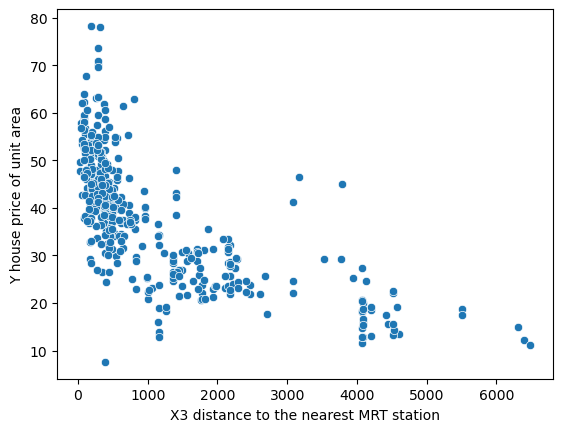

In [9]:
sns.scatterplot(data=data, x='X3 distance to the nearest MRT station', y='Y house price of unit area')

## Distance to metro station seems to have a pretty significant effect (obviously) this seems like a good feature to include

<AxesSubplot: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

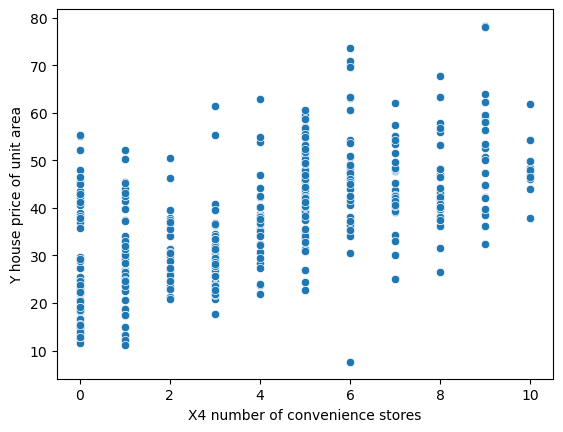

In [10]:
sns.scatterplot(data=data, x='X4 number of convenience stores', y='Y house price of unit area')

<AxesSubplot: xlabel='X2 house age', ylabel='Y house price of unit area'>

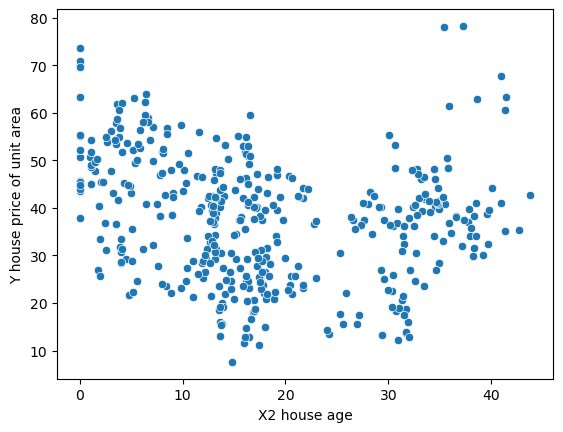

In [11]:
sns.scatterplot(data=data, x='X2 house age', y='Y house price of unit area')

## House age doesn't seem to correlate much to price, we might not want to include it in our model


<AxesSubplot: xlabel='X5 latitude', ylabel='Y house price of unit area'>

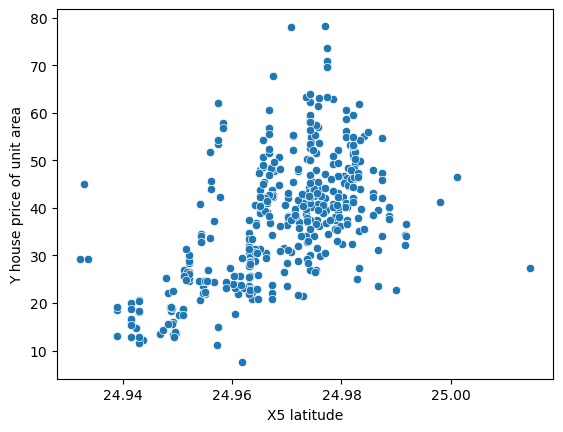

In [12]:
sns.scatterplot(data=data, x='X5 latitude', y='Y house price of unit area')

<AxesSubplot: xlabel='X6 longitude', ylabel='Y house price of unit area'>

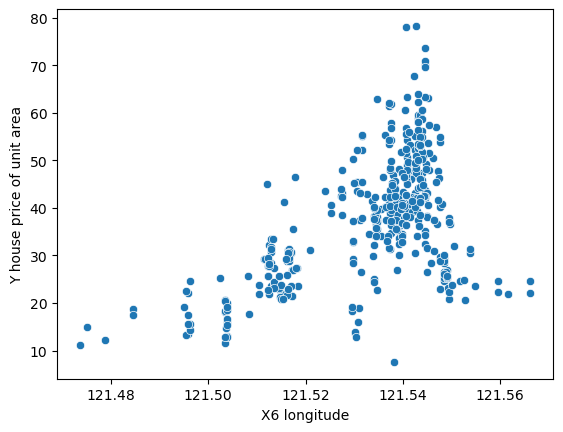

In [13]:
sns.scatterplot(data=data, x='X6 longitude', y='Y house price of unit area')

# these look good enough so i guess we can include them

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [15]:
feature_cols = ['X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
y = data['Y house price of unit area']
X = data[feature_cols]

In [20]:
# make train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
rfr = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

In [37]:
rfr.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=200)

In [38]:
score = rfr.score(X_train, y_train)
print(score)

0.9311080472799753


In [39]:
from sklearn.metrics import mean_squared_error
ypred = rfr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  58.37781048192785
RMSE:  29.188905240963926


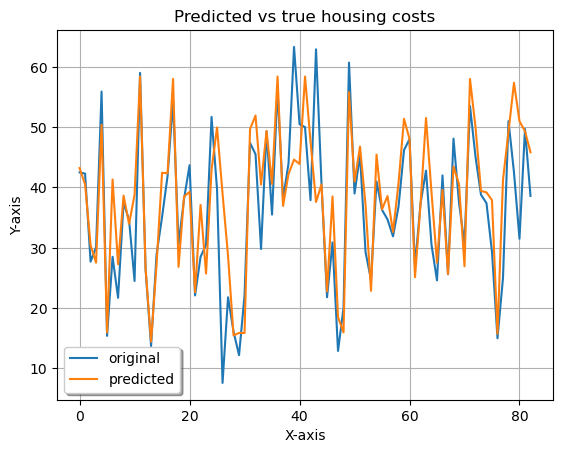

In [40]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Predicted vs true housing costs")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [41]:
y_test, ypred

(395    42.5
 350    42.3
 401    27.7
 354    30.1
 181    55.9
        ... 
 288    51.0
 323    42.5
 202    31.5
 275    49.7
 390    38.6
 Name: Y house price of unit area, Length: 83, dtype: float64,
 array([43.21875, 40.50975, 30.43375, 27.527  , 50.412  , 15.973  ,
        41.332  , 27.266  , 38.651  , 33.97225, 38.7665 , 58.394  ,
        26.65225, 14.437  , 27.266  , 42.4415 , 42.3555 , 57.99375,
        26.84475, 38.512  , 39.264  , 22.647  , 37.1045 , 25.72575,
        42.9555 , 49.96   , 38.9915 , 28.63575, 15.473  , 15.8865 ,
        15.87475, 49.6765 , 51.92975, 40.479  , 49.36875, 40.5775 ,
        58.394  , 36.94075, 42.2325 , 44.61975, 43.89875, 58.394  ,
        47.60775, 37.59475, 40.50975, 22.769  , 38.5085 , 18.49925,
        15.973  , 55.79925, 40.962  , 46.78025, 37.159  , 22.851  ,
        45.44475, 36.37325, 38.57275, 32.62175, 40.685  , 51.3885 ,
        48.04775, 25.129  , 37.159  , 51.527  , 39.1775 , 27.527  ,
        39.59775, 25.662  , 43.48475, 40.5775 

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, ypred)


5.097259036144594

# Mean Absolute Error (MAE) is around 5 so on average, the prediction is wrong by about 5.

## A naive regressor which just predicts the average value of the training data had an MAE of 10 so we reduced the MAE by 5



In [162]:
import tensorflow as tf

In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
in_scaler = MinMaxScaler()
#in_scaler.fit(X)
X[feature_cols] = in_scaler.fit_transform(X[feature_cols])
X = X[feature_cols]
out_scaler = MinMaxScaler()
y = np.asarray(y)
y = y.reshape(-1,1)
y = out_scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.2, random_state=42)

/tmp/ipykernel_2118/303157754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature_cols] = in_scaler.fit_transform(X[feature_cols])


In [165]:

from tensorflow import keras
from keras import Sequential
from keras.layers import LeakyReLU, Dense
from keras import losses
from tensorflow.keras.callbacks import EarlyStopping


In [173]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)

In [174]:
model = keras.Sequential()
model.add(Dense(units=128, input_dim=4, activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mae', optimizer='adam')

In [175]:
history = model.fit(X_train[feature_cols], y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[early_stopping]) 


Epoch 1/20
11/11 [==============================] - 0s 28ms/step - loss: 0.3018 - val_loss: 0.1183
Epoch 2/20
11/11 [==============================] - 0s 9ms/step - loss: 0.1271 - val_loss: 0.1394
Epoch 3/20
11/11 [==============================] - 0s 10ms/step - loss: 0.1149 - val_loss: 0.1178
Epoch 4/20
11/11 [==============================] - 0s 11ms/step - loss: 0.0951 - val_loss: 0.1042
Epoch 5/20
11/11 [==============================] - 0s 16ms/step - loss: 0.0929 - val_loss: 0.1083
Epoch 6/20
11/11 [==============================] - 0s 9ms/step - loss: 0.0915 - val_loss: 0.1036
Epoch 7/20
11/11 [==============================] - 0s 11ms/step - loss: 0.0891 - val_loss: 0.0977
Epoch 8/20
11/11 [==============================] - 0s 9ms/step - loss: 0.0895 - val_loss: 0.0972
Epoch 9/20
11/11 [==============================] - 0s 8ms/step - loss: 0.0872 - val_loss: 0.0899
Epoch 10/20
11/11 [==============================] - 0s 9ms/step - loss: 0.0872 - val_loss: 0.0953
Epoch 11/20
11

## Let's plot the learning curve

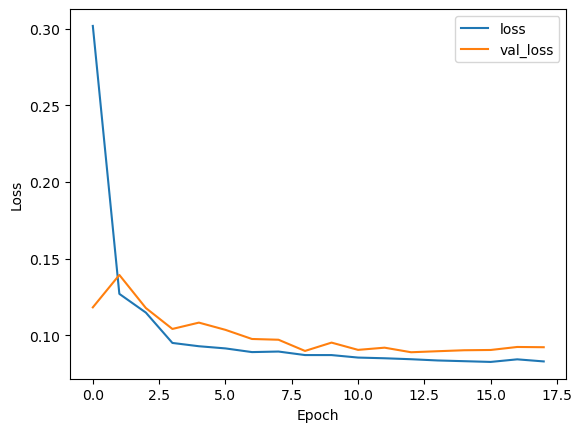

In [176]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Let's test the performance of the neural network

In [177]:
# make predictions with model then undo scaling
pred = model.predict(X_test)
pred = out_scaler.inverse_transform(pred)
y_true = out_scaler.inverse_transform(y_test)


3/3 [==============================] - 0s 2ms/step


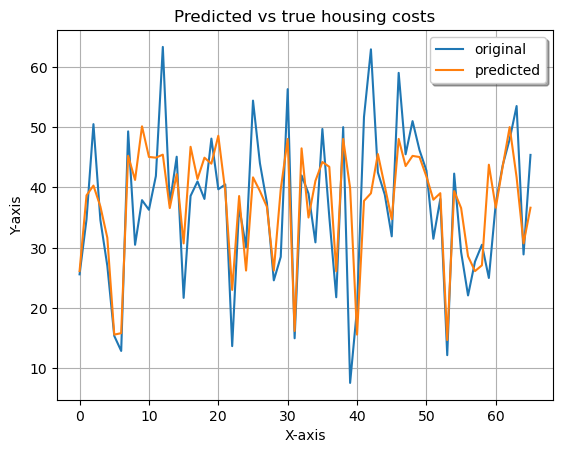

In [178]:
# plot predictions vs real value
x_ax = range(len(y_true))
plt.plot(x_ax, y_true, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("Predicted vs true housing costs")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [180]:
# calculate MSE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, pred)

5.998693495085744

# MAE is higher for NN than it was for the random forest classifier and as such the graph looks... worse

## That should be enough for this dataset, on to the next one